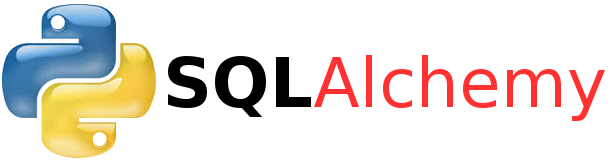

# SQLAlchemy and Plotly Express

In this notebook, we will use SQLAlchemy to connect to a PostgreSQL database and retrieve data from a table. We will progress to finally use Plotly Express to create a scatter plot on a map. We will stick with the dataset we have used so far but do feel free to use your own table if you'd like to experiment on your own.

In [ ]:
# Import create_engine and inspect functions to create a database connection
from sqlalchemy import create_engine, inspect, select

# Provide the database connection details needed to create the engine connection to the database
username = 'your username
password = 'your password
host = 'your host'
port = 'your host'  # default PostgreSQL port 5432
database = 'postgres'

# Create an engine to the Postgres database
engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

# Create an inspector object
inspector = inspect(engine)

# Get list of all table names from the default (public) schema
table_names = inspector.get_table_names()
print("Tables in the default schema:", table_names)

How do we work with this data? We can use the pandas library to load the data into a DataFrame and perform exploratory data analysis (EDA) on it. Did I mention how useful the pandas library is for data manipulation and analysis? Let's use a SQL query to select the data from our table and load it into a DataFrame.

In [ ]:
import pandas as pd

# Query to select all data from the trips table
# The table name starts with a number and contains underscores, 
# so it needs to be wrapped in inverted commas
query = 'SELECT * FROM public."your table" LIMIT 1000;' 

# Load data into a DataFrame
df = pd.read_sql(query, engine)

Let's have a look at the `shape' of the DataFrame loaded with your SQL query.

In [ ]:
# Check the number of rows and columns
df.shape

We can also get a concise summary of the DataFrame using the `info()` method. This will provide information on the number of non-null entries in each column and the data type of each column, just like we did previously.

In [ ]:
# Get a concise summary of the DataFrame
df.info()

Do you want to see the first `x` number of rows in the DataFrame? You can use the `head()` method to display the first few rows of the DataFrame. See if you can display the first 12 rows of the DataFrame.

In [ ]:
# Display the first few entries
df.head()

Let's perform some exploratory data analysis (EDA) on the data. We can start by calculating the descriptive statistics for the numerical fields in the DataFrame. This will give us an overview of the distribution of values in these fields.

In [ ]:
# Descriptive statistics for numerical fields
df.describe()

We can also calculate the frequency of each unique value in a column. This will help us understand the distribution of values in the column. Let's calculate the frequency of each unique value in the `member_casual` column.  

In [ ]:
# Frequency of each user type
df['member_casual'].value_counts() 

We can calculate the average duration of trips in the dataset. This will give us an idea of the typical duration of a trip.

In [ ]:
# Calculate and print the average duration of trips
df['duration'] = (pd.to_datetime(df['ended_at']) - pd.to_datetime(df['started_at'])).dt.total_seconds() / 60
print("Average Trip Duration:", df['duration'].mean(), "minutes")

We can also plot a histogram of the trip durations to visualise the distribution of trip durations. This will help us understand the typical duration of trips and the spread of trip durations in the dataset.

In [ ]:
# Import matplotlib for additional customisation
import matplotlib.pyplot as plt  
import seaborn as sns

# Make sure to calculate duration in minutes if not done already
df['duration'] = (pd.to_datetime(df['ended_at']) - pd.to_datetime(df['started_at'])).dt.total_seconds() / 60

# Plotting the distribution of durations
plt.figure(figsize=(12, 6))
sns.histplot(df['duration'], bins=30, kde=True, color='brown')
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 120)  # Limiting to 120 minutes for better visibility
plt.show()

You are encouraged to visit the plotly website to see what is possible with [scatter_mapbox](https://plotly.com/python/scattermapbox/) and their other graphing libraries.

There has to be a map in our analysis, right? Let's use Plotly Express to create a scatter plot on a map. We will use the latitude and longitude columns in the dataset to plot the start locations of the trips on a map. This will give us a visual representation of the start locations of the trips.

In [ ]:
import plotly.express as px

# Use a sample of the data for better performance in visualisation
sample_data = df.sample(n=100, random_state=1)

fig = px.scatter_mapbox(sample_data, lat="start_lat", lon="start_lng",
                        hover_name="start_station_name", hover_data=["ride_id", "member_casual"],
                        color_discrete_sequence=["fuchsia"], zoom=10, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()